In [2]:
import numpy as np
from xarray import Dataset, DataArray
from scipy.interpolate import RectBivariateSpline

from local.lib.read_raster import read_raster
from local.lib.bisicles_defaults import X0LEV, Y0LEV

ImportError: cannot import name 'X0LEV' from 'local.lib.bisicles_defaults' (/Users/jonniebarnsley/code/phd/local/lib/bisicles_defaults.py)

Regrid Smith 2020 Cryosat-2 dHdt data onto the BISICLES 8km grid

In [1]:
x_r, y_r, dhdt_r = read_raster('/Users/jonniebarnsley/data/ICESat2 mass change/dhdt/ais_dhdt_grounded_filt.tif')
x_r -= (-3067750 - 4000)
y_r -= (-3067750 - 4000)
dhdt_r = np.where(np.isnan(dhdt_r), 0.0, dhdt_r)
dhdt = RectBivariateSpline(y_r, x_r, dhdt_r)(X0LEV, Y0LEV)

NameError: name 'read_raster' is not defined

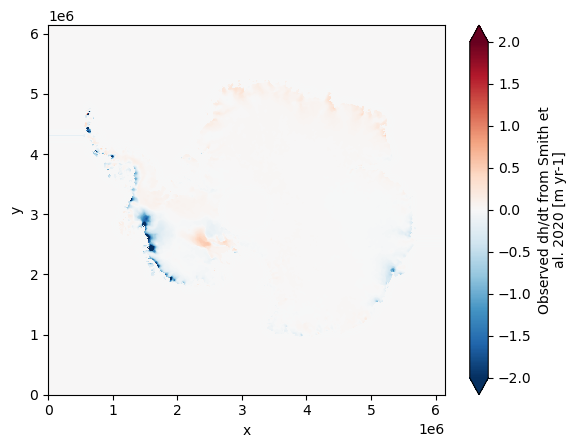

In [29]:
da = DataArray(
    dhdt,
    dims=('y', 'x'),
    coords={'y': Y0LEV, 'x': X0LEV},
    attrs={'units': 'm yr-1', 'long_name': 'Observed dh/dt from Smith et al. 2020'}
)
da.plot(vmax=2)

In [30]:
ds = Dataset(
    {'dhdt_obs': da}
)
ds.to_netcdf('/Users/jonniebarnsley/data/ICESat2 mass change/dhdt/ais_dhdt_grounded_filt_bisicles_8km.nc')